## About

This plot is a **combination** of multiple [choropleth maps](/choropleth-map), with a [lollipop plot](/lollipop-plot) as a legend. It shows the share of explained happiness of different factors across Europe.

The chart was made by [Joseph B](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![preview](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-multiple-maps.png?raw=true)


## Libraries

First, you need to load a whole bunch of libraries:


In [1]:
# data
import pandas as pd
import geopandas as gpd

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# annotations
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
from highlight_text import ax_text, fig_text
import matplotlib.patheffects as path_effects

## Dataset

For this reproduction, we're going to retrieve the data directly from the gallery's Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

The dataset contains **one row per country** and its associated value. The dataset has been transformed a bit, but you can find the original data [here](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024).

Note: the `geometry` column is used to create the shape of the countries on the map.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/WHRreport2024.csv"
df = pd.read_csv(url)

# open and merge with geo data
world = gpd.read_file(
    "../../static/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
)
europe = world[world['CONTINENT'] == 'Europe']
data = europe.merge(
    df, how='left',
    left_on='NAME',
    right_on='Country name'
)
data = data[['geometry']+df.columns.to_list()]
data.dropna(inplace=True)
data.head(3)

,geometry,Country name,Ladder score,upperwhisker,lowerwhisker,Dystopia + residual,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,share_Dystopia + residual,share_Log GDP per capita,share_Social support,share_Healthy life expectancy,share_Freedom to make life choices,share_Generosity,share_Perceptions of corruption
1,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",Norway,7.302,7.389,7.215,1.586,1.952,1.517,0.704,0.835,0.224,0.484,21.720077,26.732402,20.775130,9.641194,11.435223,3.067653,6.628321
2,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",France,6.609,6.685,6.533,1.672,1.818,1.348,0.727,0.650,0.112,0.281,25.298835,27.507944,20.396429,11.000151,9.835073,1.694659,4.251778
3,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,7.344,7.422,7.267,1.658,1.878,1.501,0.724,0.838,0.221,0.524,22.576253,25.571895,20.438453,9.858388,11.410675,3.009259,7.135076


## Initiate the maps

We start by creating a figure with **3 rows and 2 columns**.

Then, we add the maps, with default colors on the **last 4 axes**.


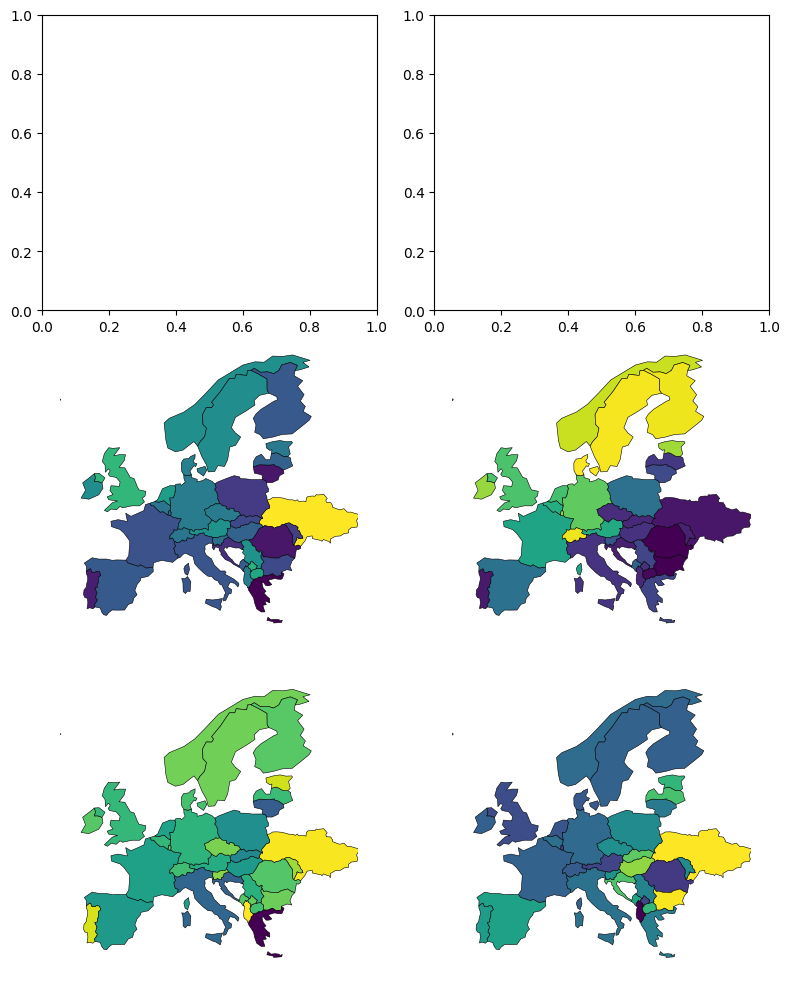

In [3]:
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    data.plot(
        column=column,
        edgecolor='black', linewidth=0.4,
        ax=ax
    )
    ax.set_xlim(-13.8, 40)
    ax.set_ylim(32, 72)
    ax.axis('off')


# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()

# list that we use to display maps,
# with empty values for 2 first axes
columns = [
    '', '',
    'share_Generosity',
    'share_Perceptions of corruption',
    'share_Freedom to make life choices',
    'share_Social support'
]
for i, (ax, column) in enumerate(zip(axs, columns)):

    # skip first two axes (on top of the maps)
    if i in [0, 1]:
        continue

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)

# display chart
plt.tight_layout()
plt.show()

## Custom colors

For this chart, we define a `colors` dictionnary that contains column names as keys, and a **list of 2 colors** as values. We do so in order to then create colormaps (or cmap) based on those colors, thanks to the `create_gradient_colormap()` function, defined below.

We also use the `set_facecolor()` to **change background color** of the figure and the lollipop axe. The first axe **does not need** it since it will be completly removed in the next step and will **have the figure color** as well.


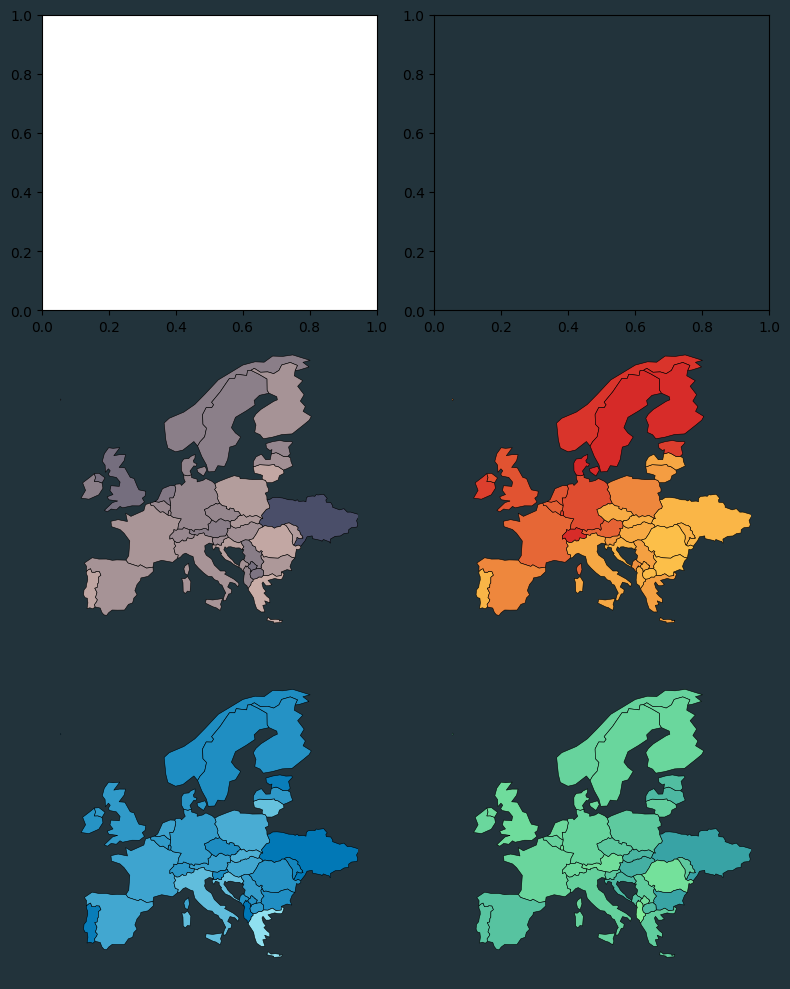

In [4]:
def create_gradient_colormap(colors):
    """
    Based on 2 color input, create a colormap of it.
    """
    cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
    return cmap


def plot_map_on_ax(column, ax, cmap):
    """
    Add a map on a given axis.
    """
    data.plot(
        column=column,
        cmap=cmap,
        edgecolor='black', linewidth=0.4,
        ax=ax
    )
    ax.set_xlim(-13.8, 40)
    ax.set_ylim(32, 72)
    ax.axis('off')


# colors for the chart
colors = {
    'share_Generosity': ['#c9ada7', '#4a4e69'],
    'share_Perceptions of corruption': ['#fcbf49', '#d62828'],
    'share_Freedom to make life choices': ['#90e0ef', '#0077b6'],
    'share_Social support': ['#80ed99', '#38a3a5'],
}
background_col = '#22333b'

# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()

# set background color
fig.set_facecolor(background_col)
axs[1].set_facecolor(background_col)

# list that we use to display maps,
# with empty values for 2 first axes
columns = [
    '', '',
    'share_Generosity',
    'share_Perceptions of corruption',
    'share_Freedom to make life choices',
    'share_Social support'
]
for i, (ax, column) in enumerate(zip(axs, columns)):

    # skip first two axes (on top of the maps)
    if i in [0, 1]:
        continue

    # create a colormap based on colors
    cmap = create_gradient_colormap(colors[column])

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax, cmap=cmap)

# display chart
plt.tight_layout()
plt.show()

## Add lollipop plot

Making a [lollipop plot](/lollipop-plot) can be a bit tricky in matplotlib, especially when having points on **both side**.

For this, we use the `scatter()` function for the points and the `hlines()` function for the horizontal lines.

The positions are defined thanks to the `min_max_df`, defined in the code below. It contains **one row per column** (so 4 in total) and a column for the minimum value and one for the maximum.


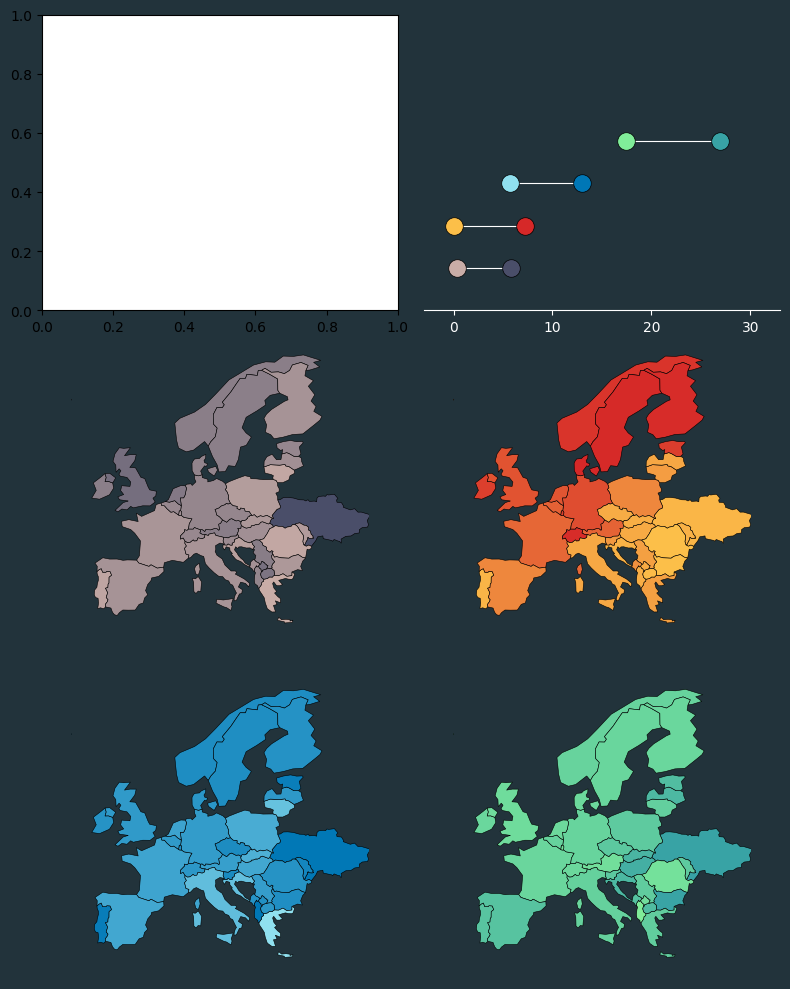

In [8]:
def create_gradient_colormap(colors):
    """
    Based on 2 color input, create a colormap of it.
    """
    cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
    return cmap


def plot_map_on_ax(column, ax, cmap):
    """
    Add a map on a given axis.
    """
    data.plot(
        column=column,
        cmap=cmap,
        edgecolor='black', linewidth=0.4,
        ax=ax
    )
    ax.set_xlim(-13.8, 40)
    ax.set_ylim(32, 72)
    ax.axis('off')


# colors for the chart
colors = {
    'share_Generosity': ['#c9ada7', '#4a4e69'],
    'share_Perceptions of corruption': ['#fcbf49', '#d62828'],
    'share_Freedom to make life choices': ['#90e0ef', '#0077b6'],
    'share_Social support': ['#80ed99', '#38a3a5'],
}
background_col = '#22333b'

# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()

# set background color
fig.set_facecolor(background_col)
axs[1].set_facecolor(background_col)

# list that we use to display maps,
# with empty values for 2 first axes
columns = [
    '', '',
    'share_Generosity',
    'share_Perceptions of corruption',
    'share_Freedom to make life choices',
    'share_Social support'
]
for i, (ax, column) in enumerate(zip(axs, columns)):

    # skip first two axes (on top of the maps)
    if i in [0, 1]:
        continue

    # create a colormap based on colors
    cmap = create_gradient_colormap(colors[column])

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax, cmap=cmap)

# Lollipop plot
min_max_df = data[columns[2:]].agg(['min', 'max']).T
for i, col in enumerate(columns[2:]):

    # colors
    min_color = colors[col][0]
    max_color = colors[col][1]

    # filter on current column
    subset = min_max_df.iloc[i].T

    # add data points of lollipop
    axs[1].scatter(subset['min'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=min_color)
    axs[1].scatter(subset['max'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=max_color)

# horizontal lines of lollipop
axs[1].hlines(
    y=range(4),
    xmin=min_max_df['min'], xmax=min_max_df['max'],
    color='white', linewidth=0.8, zorder=1
)

# custom lollipop axis features
axs[1].spines[['right', 'top', 'left']].set_visible(False)
axs[1].set_xticks([0, 10, 20, 30, 40])
axs[1].spines['bottom'].set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].set_yticks([])
axs[1].set_ylim(-1, 6)
axs[1].set_xlim(-3, 33)

# display chart
plt.tight_layout()
plt.show()

## Title and description

The title (and the description) are displayed using the `ax_text()` function from the `highlight_text` package. For a dedicated **explanation** of how it works, [check this post](/advanced-custom-annotations-matplotlib).


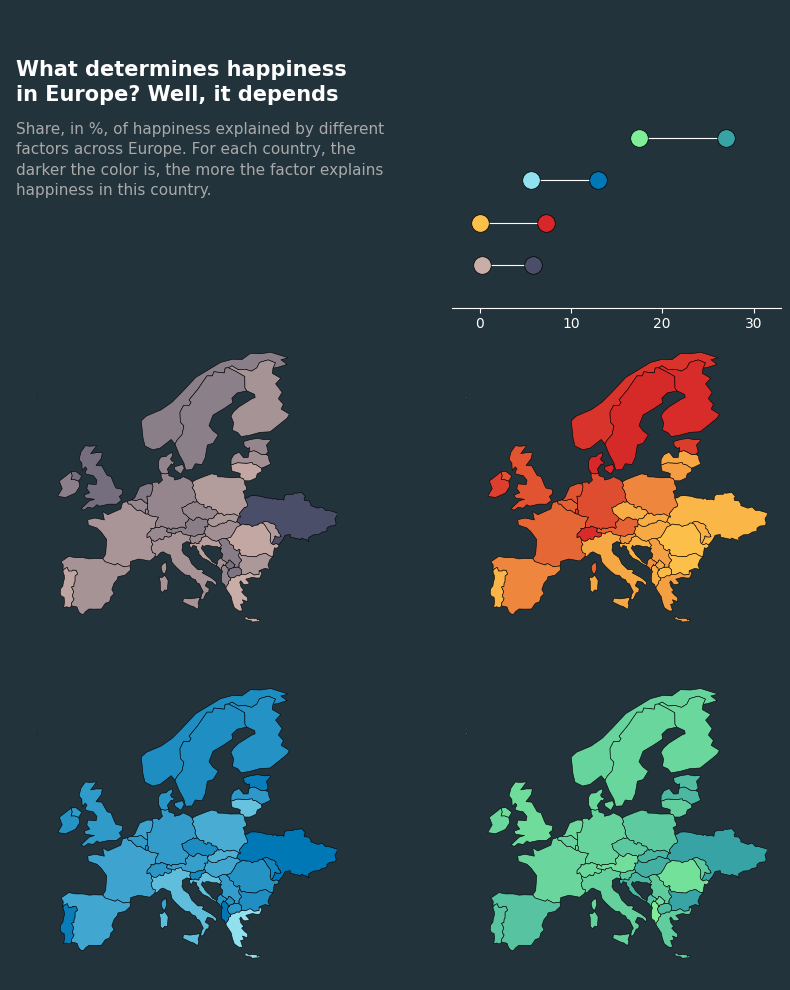

In [9]:
def create_gradient_colormap(colors):
    """
    Based on 2 color input, create a colormap of it.
    """
    cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
    return cmap

def plot_map_on_ax(column, ax, cmap):
    """
    Add a map on a given axis.
    """
    data.plot(
        column=column,
        cmap=cmap,
        edgecolor='black', linewidth=0.4,
        ax=ax
    )
    ax.set_xlim(-13.8, 40)
    ax.set_ylim(32, 72)
    ax.axis('off')

# colors for the chart
colors = {
    'share_Generosity': ['#c9ada7', '#4a4e69'],
    'share_Perceptions of corruption': ['#fcbf49', '#d62828'],
    'share_Freedom to make life choices': ['#90e0ef', '#0077b6'],
    'share_Social support': ['#80ed99', '#38a3a5'],
}
background_col = '#22333b'

# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()

# set background color
fig.set_facecolor(background_col)
axs[1].set_facecolor(background_col)

# list that we use to display maps,
# with empty values for 2 first axes
columns = [
    '', '',
    'share_Generosity',
    'share_Perceptions of corruption',
    'share_Freedom to make life choices',
    'share_Social support'
]
for i, (ax, column) in enumerate(zip(axs, columns)):

    # skip first two axes (on top of the maps)
    if i in [0, 1]:
        continue

    # create a colormap based on colors
    cmap = create_gradient_colormap(colors[column])

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax, cmap=cmap)

# Lollipop plot
min_max_df = data[columns[2:]].agg(['min', 'max']).T
for i, col in enumerate(columns[2:]):

    # colors
    min_color = colors[col][0]
    max_color = colors[col][1]

    # filter on current column
    subset = min_max_df.iloc[i].T

    # add data points of lollipop
    axs[1].scatter(subset['min'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=min_color)
    axs[1].scatter(subset['max'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=max_color)

# horizontal lines of lollipop
axs[1].hlines(
    y=range(4),
    xmin=min_max_df['min'], xmax=min_max_df['max'],
    color='white', linewidth=0.8, zorder=1
)

# custom lollipop axis features
axs[1].spines[['right', 'top', 'left']].set_visible(False)
axs[1].set_xticks([0, 10, 20, 30, 40])
axs[1].spines['bottom'].set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].set_yticks([])
axs[1].set_ylim(-1, 6)
axs[1].set_xlim(-3, 33)

# remove top left axis
axs[0].set_axis_off()

# title and credit
text = """
<What determines happiness>
<in Europe? Well, it depends>


<Share, in %, of happiness explained by different>
<factors across Europe. For each country, the>
<darker the color is, the more the factor explains>
<happiness in this country.>
"""
ax_text(
    -0.02, 0.6,
    text,
    ha='left', va='center',
    fontsize=15,
    color='black',
    highlight_textprops=[
        {'fontweight': 'bold',
         'color': 'white'},
        {'fontweight': 'bold',
         'color': 'white'},

        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11}
    ],
    ax=axs[0]
)

# display chart
plt.tight_layout()
plt.show()

## Annotations

Similar to the title, the **annotations** are displayed using the `ax_text()` and `fig_text()` function from the `highlight_text` package.

The **arrows** are displayed using `FancyArrowPatch()` function from matplotlib. We define a `draw_arrow()` function in order to make the code a bit easier to read when adding arrows. It just needs **tail and head positions** to add arrows on the figure.


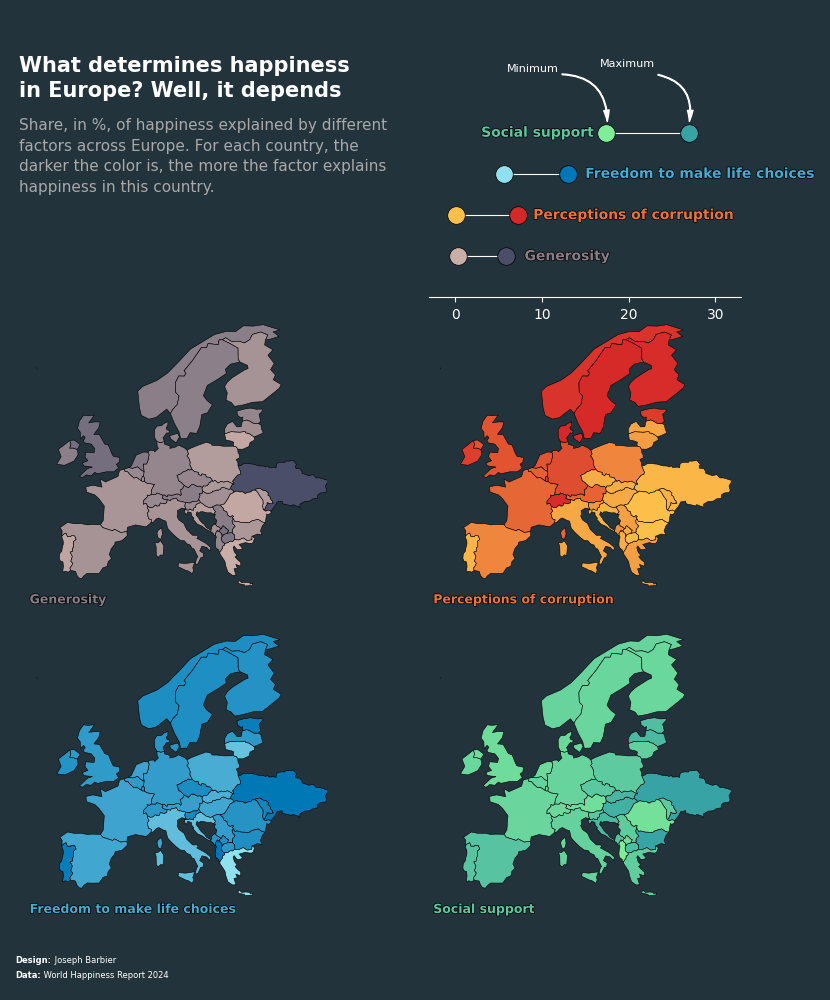

In [7]:
def create_gradient_colormap(colors):
    """
    Based on 2 color input, create a colormap of it.
    """
    cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
    return cmap

def draw_arrow(tail_position, head_position, fig, invert=False):
    """
    Draw a curve arrow at given tail/head position, on a figure.
    """
    kw = dict(
        arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color="white")
    if invert:
        connectionstyle = "arc3,rad=-.5"
    else:
        connectionstyle = "arc3,rad=.5"
    a = FancyArrowPatch(tail_position, head_position,
                        connectionstyle=connectionstyle,
                        transform=fig.transFigure,
                        **kw)
    fig.patches.append(a)

def plot_map_on_ax(column, ax, cmap):
    """
    Add a map on a given axis.
    """
    data.plot(
        column=column,
        cmap=cmap,
        edgecolor='black', linewidth=0.4,
        ax=ax
    )
    ax.set_xlim(-13.8, 40)
    ax.set_ylim(32, 72)
    ax.axis('off')

def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=1, foreground="black")

# colors for the chart
colors = {
    'share_Generosity': ['#c9ada7', '#4a4e69'],
    'share_Perceptions of corruption': ['#fcbf49', '#d62828'],
    'share_Freedom to make life choices': ['#90e0ef', '#0077b6'],
    'share_Social support': ['#80ed99', '#38a3a5'],
}
background_col = '#22333b'

# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()

# set background color
fig.set_facecolor(background_col)
axs[1].set_facecolor(background_col)

# list that we use to display maps,
# with empty values for 2 first axes
columns = [
    '', '',
    'share_Generosity',
    'share_Perceptions of corruption',
    'share_Freedom to make life choices',
    'share_Social support'
]

# annotation positions on the lollipop
annotations_pos = [
    '', '',
    [8, 0],
    [9, 1],
    [15, 2],
    [3, 3]
]

# iterate over of the 6 axes AND column names
for i, (ax, column) in enumerate(zip(axs, columns)):

    # skip first two axes (on top of the maps)
    if i in [0, 1]:
        continue

    # create a colormap based on colors
    cmap = create_gradient_colormap(colors[column])

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax, cmap=cmap)

    # annotations below each map
    ax_text(
        -15, 33, # fixed position for each map
        '<'+column[6:]+'>',
        ha='left', va='center',
        fontsize=9, fontweight='bold',
        color=cmap(0.5),
        highlight_textprops=[
            {"path_effects": pe}
        ], ax=ax
    )

    # annotations on lollipop
    x, y = annotations_pos[i]
    ax_text(
        x, y,
        '<'+column[6:]+'>',
        ha='left', va='center',
        fontweight='bold',
        fontsize=10,
        color=cmap(0.5),
        highlight_textprops=[
            {"path_effects": pe}
        ], ax=axs[1]
    )

# Lollipop plot
min_max_df = data[columns[2:]].agg(['min', 'max']).T
for i, col in enumerate(columns[2:]):

    # colors
    min_color = colors[col][0]
    max_color = colors[col][1]

    # filter on current column
    subset = min_max_df.iloc[i].T

    # add data points of lollipop
    axs[1].scatter(subset['min'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=min_color)
    axs[1].scatter(subset['max'], i, zorder=2, s=160, edgecolor='black', linewidth=0.5, color=max_color)

# horizontal lines of lollipop
axs[1].hlines(
    y=range(4),
    xmin=min_max_df['min'], xmax=min_max_df['max'],
    color='white', linewidth=0.8, zorder=1
)

# custom lollipop axis features
axs[1].spines[['right', 'top', 'left']].set_visible(False)
axs[1].set_xticks([0, 10, 20, 30, 40])
axs[1].spines['bottom'].set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].set_yticks([])
axs[1].set_ylim(-1, 6)
axs[1].set_xlim(-3, 33)

# remove top left axis
axs[0].set_axis_off()

# title and credit
text = """
<What determines happiness>
<in Europe? Well, it depends>


<Share, in %, of happiness explained by different>
<factors across Europe. For each country, the>
<darker the color is, the more the factor explains>
<happiness in this country.>
"""
ax_text(
    -0.02, 0.6,
    text,
    ha='left', va='center',
    fontsize=15,
    color='black',
    highlight_textprops=[
        {'fontweight': 'bold',
         'color': 'white'},
        {'fontweight': 'bold',
         'color': 'white'},

        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11},
        {'color': 'darkgrey',
         'fontsize': 11}
    ],
    ax=axs[0]
)

# credit
text = """
<Design:> Joseph Barbier
<Data:> World Happiness Report 2024
"""
ax_text(
    -17.6, 25, text,
    ha='left', va='center',
    fontsize=6, color='white',
    highlight_textprops=[
        {'fontweight': 'bold'},
        {'fontweight': 'bold'},
    ], ax=axs[4]
)

# reduce size and change position of lollipop axe
axs[1].set_position([0.56, 0.68, 0.2, 0.1])

# legend arrows
draw_arrow((0.7, 0.92), (0.76, 0.87), fig=fig, invert=True)
draw_arrow((0.82, 0.92), (0.862, 0.87), fig=fig, invert=True)
ax_text(
    6, 4.7, 'Minimum',
    fontsize=8, color='white',
    ax=axs[1]
)
ax_text(
    16.7, 4.8, 'Maximum',
    fontsize=8, color='white',
    ax=axs[1]
)

plt.tight_layout()
fig.savefig('../../static/graph/web-multiple-maps.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce **a multiple** [choropleth maps](/choropleth-map) with a [lollipop plot](/lollipop-plot) for the legend.

You might be interested in

- reproducing a [beautiful dumbell/lollipop chart](/web-dumbell-chart)
- how to create a fully customized [choropleth map](/web-map-europe-with-color-by-country).
